In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("E:/Python Programs/EuroAstro/new_y1.csv")
df.head()

Date_  Month  Date  Year  Weekday  Lagna  Sun  Moon  Mars  Mercury  \
0   1/1/2021      1     1  2021   Friday     20   40     9     2       80   
1   1/5/2021      1     5  2021  Tuesday     30   60    26     2       42   
2   1/8/2021      1     8  2021   Friday     40   80    48     3       63   
3  1/12/2021      1    12  2021  Tuesday     11   21    80     3       22   
4  1/15/2021      1    15  2021   Friday     11   42    92     4       66   

   Jupiter  Venus  Saturn  Rahu  Ketu          1st Num  
0       84     72      84     5    54  sixteentwenties  
1       84     19      84     5    54   elevenfifteens  
2       22     38      84     5    54  sixteentwenties  
3       22     76      84     5    54         onefives  
4       22     20      84     5    54         onefives

In [18]:
df.drop(labels=['Date_'],axis=1,inplace=True)

In [19]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])
df["1st Num"] = encoding.fit_transform(df["1st Num"])

In [20]:
df.head()

Month  Date  Year  Weekday  Lagna  Sun  Moon  Mars  Mercury  Jupiter  \
0      1     1     0        0     20   40     9     2       80       84   
1      1     5     0        1     30   60    26     2       42       84   
2      1     8     0        0     40   80    48     3       63       22   
3      1    12     0        1     11   21    80     3       22       22   
4      1    15     0        0     11   42    92     4       66       22   

   Venus  Saturn  Rahu  Ketu  1st Num  
0     72      84     5    54        2  
1     19      84     5    54        0  
2     38      84     5    54        2  
3     76      84     5    54        1  
4     20      84     5    54        1

In [78]:
X = df[['Lagna','Sun','Moon','Mars','Mercury','Jupiter','Venus','Saturn','Rahu','Ketu','1st Num']]

## Scatter Plot (Numerical - Numerical - Categorical - Categorical)

<Axes: xlabel='Mars', ylabel='Mercury'>

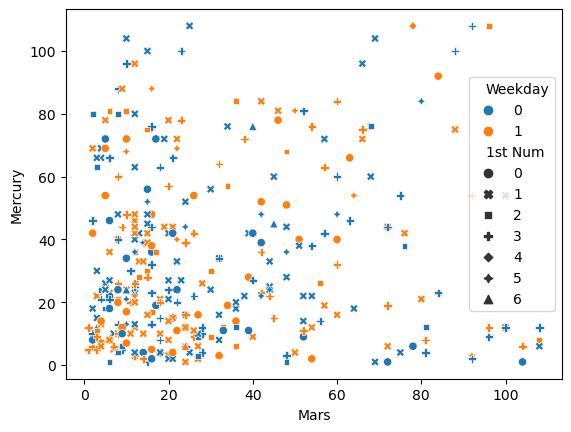

In [23]:
sns.scatterplot(data=df, x=df['Mars'], y=df['Mercury'], hue=df['Weekday'], style=df['1st Num'])

## Bar Plot (Categorical - Numerical)

<Axes: xlabel='1st Num', ylabel='Sun'>

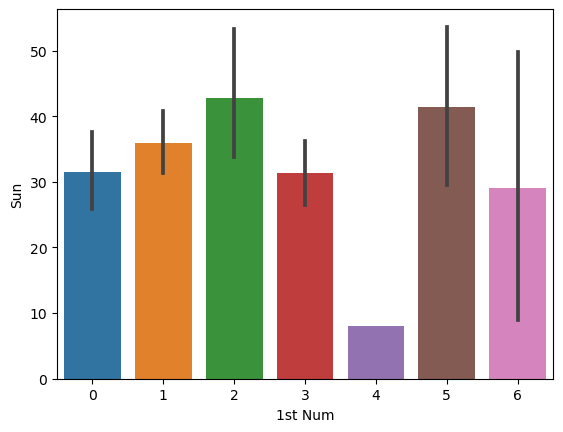

In [39]:
sns.barplot(data=df, x=df['1st Num'], y=df['Sun'])

## Box Plot (Categorical - Numerical - Categorical)

<Axes: xlabel='1st Num', ylabel='Mercury'>

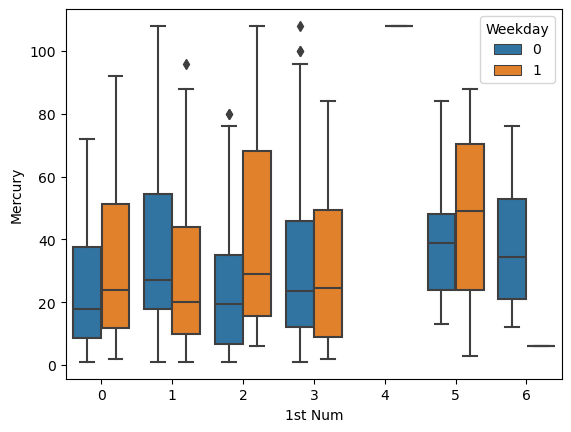

In [43]:
sns.boxplot(data=df, x=df['1st Num'], y=df['Mercury'], hue=df['Weekday'])

## Dist Plot (Numerical - Categorical)

<Axes: xlabel='1st Num', ylabel='Density'>

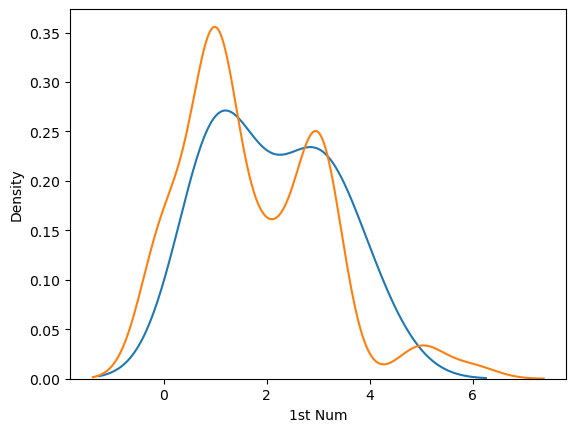

In [50]:
sns.distplot(df[df['Mercury'] >= 100]['1st Num'], hist=False)
sns.distplot(df[df['Mercury'] <= 30]['1st Num'], hist=False)

## Heatmap (Categorical - Categorical)

In [55]:
pd.crosstab(df['Weekday'],df['1st Num'])

1st Num   0   1   2   3  4   5  6
Weekday                          
0        27  72  18  52  0  13  4
1        32  68  24  48  1  12  1

<Axes: xlabel='Weekday', ylabel='1st Num'>

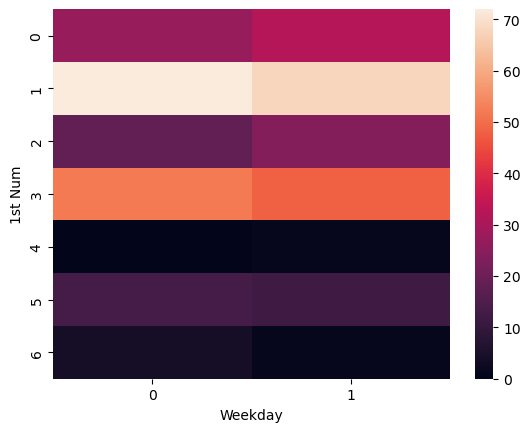

In [53]:
sns.heatmap(pd.crosstab(df['1st Num'],df['Weekday']))

In [70]:
df.groupby('1st Num').mean()['Weekday']*100

1st Num
0     54.237288
1     48.571429
2     57.142857
3     48.000000
4    100.000000
5     48.000000
6     20.000000
Name: Weekday, dtype: float64

<Axes: xlabel='1st Num'>

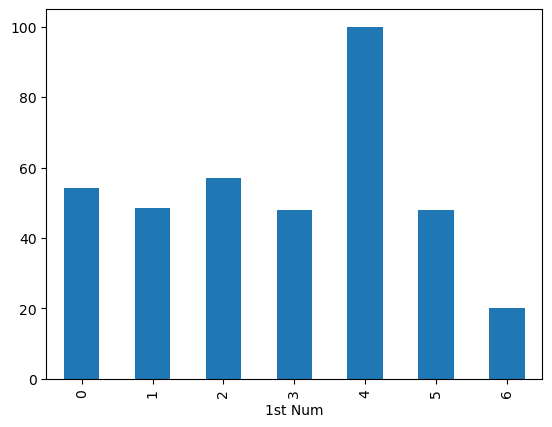

In [69]:
(df.groupby('1st Num').mean()['Weekday']*100).plot(kind='bar')

## Clustermap (Categorical - Categorical)

In [71]:
pd.crosstab(df['Weekday'],df['1st Num'])

1st Num   0   1   2   3  4   5  6
Weekday                          
0        27  72  18  52  0  13  4
1        32  68  24  48  1  12  1

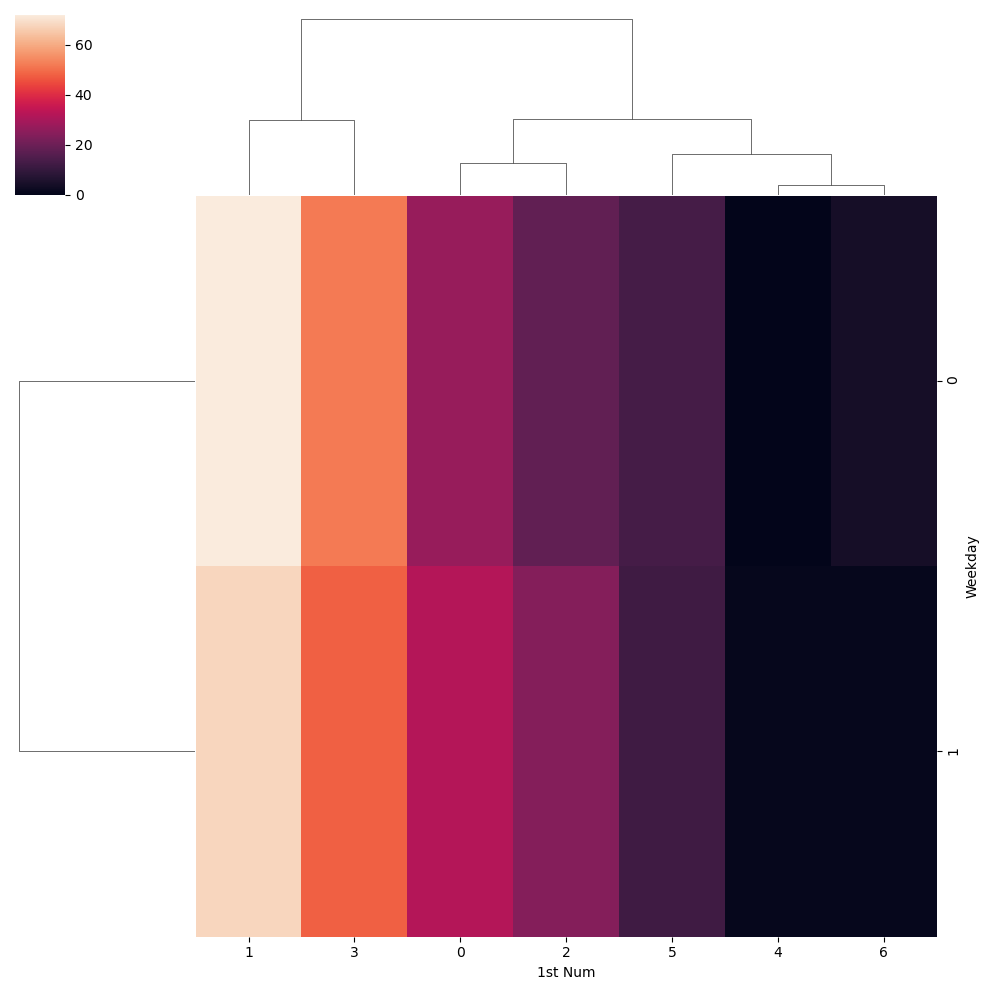

In [72]:
sns.clustermap(pd.crosstab(df['Weekday'],df['1st Num']))

## Pairplot

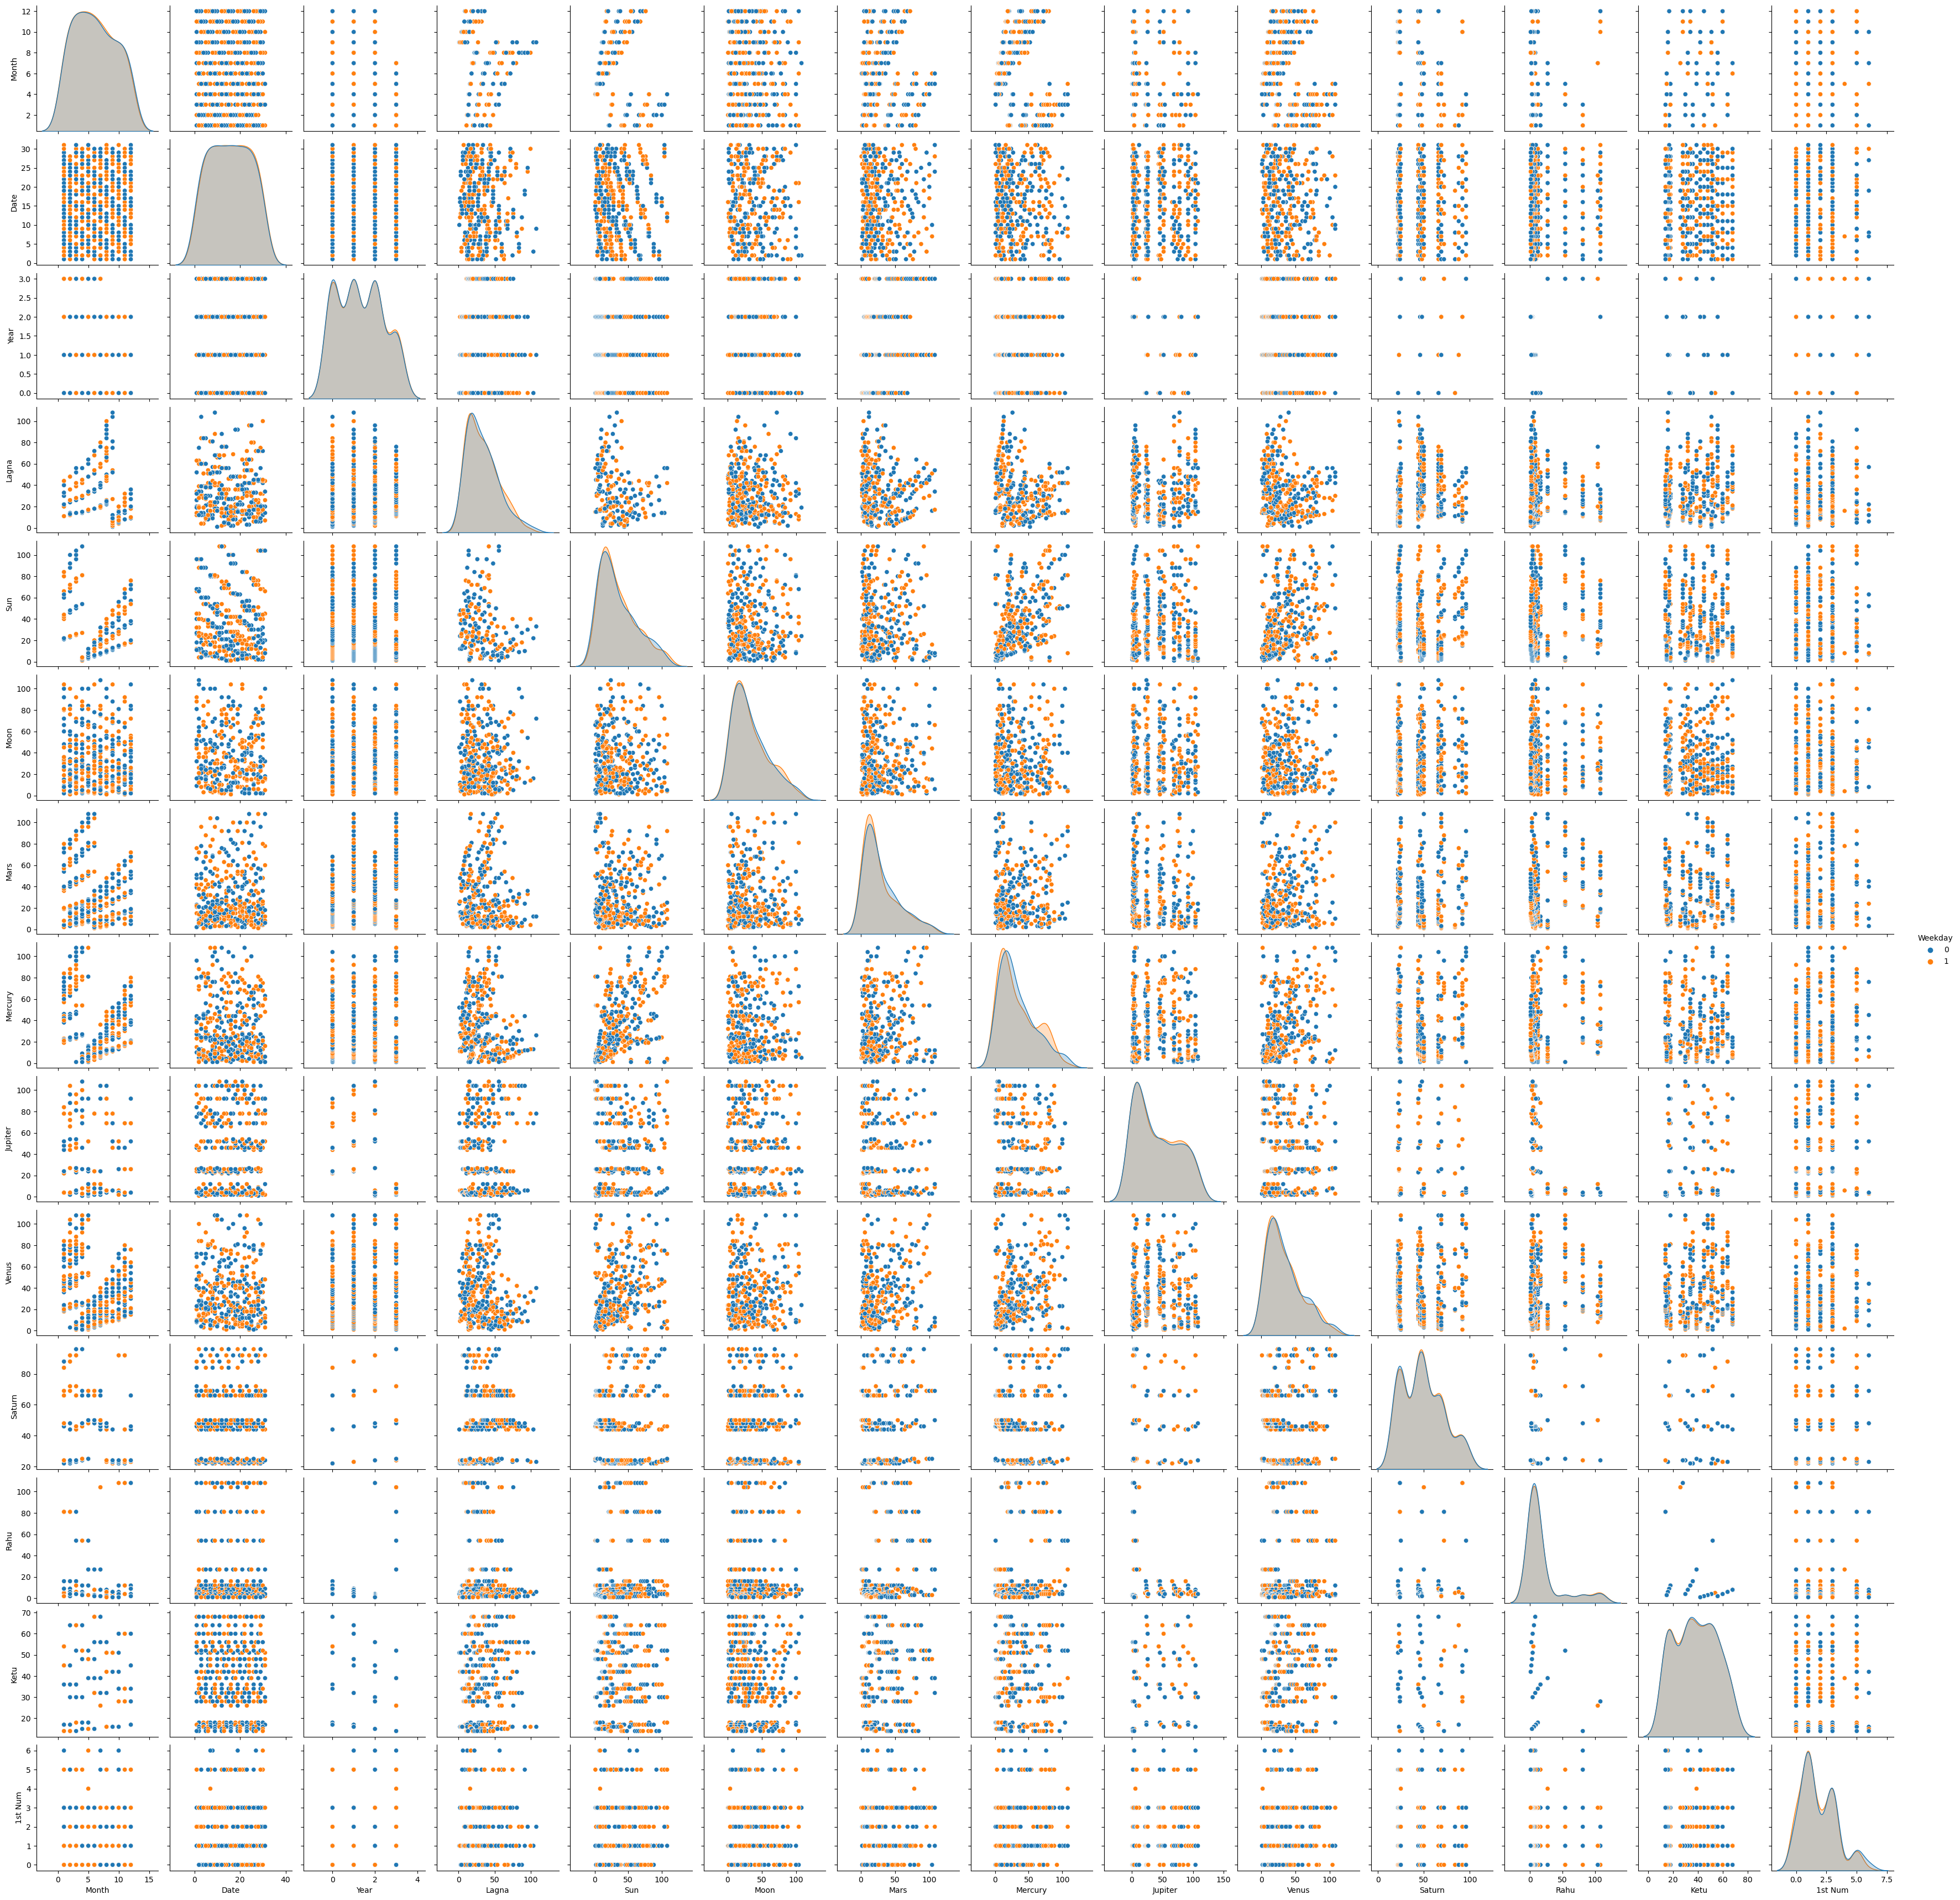

In [81]:
sns.pairplot(data=df, hue='Weekday')